<a href="https://colab.research.google.com/github/soyoonjeong/DeepLearning-study/blob/main/%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1
  return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=((10000,))))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation="sigmoid"))

In [5]:
model.compile(optimizer='rmsprop',
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [6]:
from tensorflow.keras import optimizers

model.compile(optimizer= optimizers.RMSprop(lr=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer= optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5275 - binary_accuracy: 0.7761 - val_loss: 0.3959 - val_binary_accuracy: 0.8676
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3186 - binary_accuracy: 0.8989 - val_loss: 0.3150 - val_binary_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2300 - binary_accuracy: 0.9273 - val_loss: 0.2815 - val_binary_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1803 - binary_accuracy: 0.9422 - val_loss: 0.2832 - val_binary_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1480 - binary_accuracy: 0.9519 - val_loss: 0.2799 - val_binary_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1215 - binary_accuracy: 0.9613 - val_loss: 0.3048 - val_binary_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - los

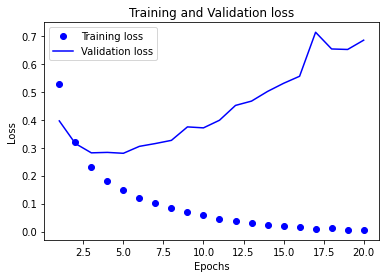

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b',label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

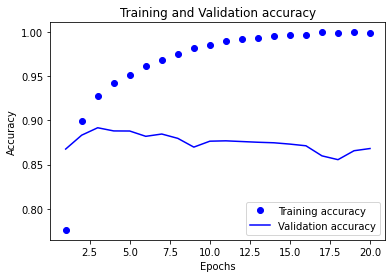

In [11]:
acc = history_dict["binary_accuracy"]
val_acc = history_dict["val_binary_accuracy"]

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b',label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [13]:
model.predict(x_test)

array([[0.01032296],
       [1.        ],
       [0.99957407],
       ...,
       [0.00532264],
       [0.00912443],
       [0.88554275]], dtype=float32)

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=((10000,))))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer='rmsprop',
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train, partial_y_train,
          epochs=4,
          batch_size=512,
          validation_data=(x_val,y_val))
results = model.evaluate(x_test, test_labels)
results

Epoch 1/4
30/30 [==============================] - 2s 36ms/step - loss: 0.4979 - accuracy: 0.7909 - val_loss: 0.3708 - val_accuracy: 0.8681
Epoch 2/4
30/30 [==============================] - 1s 28ms/step - loss: 0.2911 - accuracy: 0.9080 - val_loss: 0.3063 - val_accuracy: 0.8838
Epoch 3/4
30/30 [==============================] - 1s 27ms/step - loss: 0.2161 - accuracy: 0.9299 - val_loss: 0.2758 - val_accuracy: 0.8916
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2984 - accuracy: 0.8803


[0.2984439730644226, 0.8802800178527832]